In [ ]:
!pip install requests beautifulsoup4 nltk pandas matplotlib seaborn wordcloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://ciudadseva.com/texto/el-cuervo/"
response = requests.get(url)
response.raise_for_status()  # Lanza una excepción si la descarga falla

soup = BeautifulSoup(response.content, 'html.parser')

# Encuentra la tabla con la clase 'table-center'
tabla_poema = soup.find('table', class_='table-center')

if tabla_poema:
    # Encuentra todos los párrafos <p> dentro de la celda <td> de la tabla
    parrafos_poema = tabla_poema.find_all('p')
    texto_poema = '\n'.join([p.get_text(strip=True) for p in parrafos_poema])
    print("Texto del poema descargado correctamente.")
    # Imprimimos las primeras líneas para verificar
    print("\n".join(texto_poema.splitlines()[:5]))
else:
    print("No se pudo encontrar la tabla con el texto del poema en la página.")
    texto_poema = ""

Texto del poema descargado correctamente.
Una vez, al filo de una lúgubre media noche,mientras débil y cansado, en tristes reflexiones embebido,inclinado sobre un viejo y raro libro de olvidada ciencia,cabeceando, casi dormido,oyóse de súbito un leve golpe,como si suavemente tocaran,tocaran a la puerta de mi cuarto.“Es -dije musitando- un visitantetocando quedo a la puerta de mi cuarto.Eso es todo, y nada más.”
¡Ah! aquel lúcido recuerdode un gélido diciembre;espectros de brasas moribundasreflejadas en el suelo;angustia del deseo del nuevo día;en vano encareciendo a mis librosdieran tregua a mi dolor.Dolor por la pérdida de Leonora, la única,virgen radiante, Leonora por los ángeles llamada.Aquí ya sin nombre, para siempre.
Y el crujir triste, vago, escalofriantede la seda de las cortinas rojasllenábame de fantásticos terroresjamás antes sentidos. Y ahora aquí, en pie,acallando el latido de mi corazón,vuelvo a repetir:“Es un visitante a la puerta de mi cuartoqueriendo entrar. Algún visi

In [ ]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize(texto_poema.lower()) # Convertimos a minúsculas al tokenizar
print(f"Número de tokens iniciales: {len(tokens)}")
print(tokens[:20])

Número de tokens iniciales: 1285
['una', 'vez', ',', 'al', 'filo', 'de', 'una', 'lúgubre', 'media', 'noche', ',', 'mientras', 'débil', 'y', 'cansado', ',', 'en', 'tristes', 'reflexiones', 'embebido']


In [ ]:
from nltk.corpus import stopwords

stop_words_es = set(stopwords.words('spanish'))
stop_words_en = set(stopwords.words('english'))

# Combinamos stopwords en español e inglés
stop_words = stop_words_es.union(stop_words_en)

tokens_sin_stopwords = [w for w in tokens if not w in stop_words and w.isalpha()] # isalpha() para quitar signos de puntuación y otros caracteres no alfabéticos

print(f"Número de tokens después de eliminar stopwords: {len(tokens_sin_stopwords)}")
print(tokens_sin_stopwords[:20])

Número de tokens después de eliminar stopwords: 519
['vez', 'filo', 'lúgubre', 'media', 'noche', 'mientras', 'débil', 'cansado', 'tristes', 'reflexiones', 'embebido', 'inclinado', 'viejo', 'raro', 'libro', 'olvidada', 'ciencia', 'cabeceando', 'casi', 'dormido']


In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
tokens_lematizados = [lemmatizer.lemmatize(token) for token in tokens_sin_stopwords]

print(f"Número de tokens después de la lematización: {len(tokens_lematizados)}")
print(tokens_lematizados[:20])

Número de tokens después de la lematización: 519
['vez', 'filo', 'lúgubre', 'medium', 'noche', 'mientras', 'débil', 'cansado', 'tristes', 'reflexiones', 'embebido', 'inclinado', 'viejo', 'raro', 'libro', 'olvidada', 'ciencia', 'cabeceando', 'casi', 'dormido']


In [ ]:
import pandas as pd

df_palabras = pd.DataFrame({'palabra': tokens_lematizados})
print(df_palabras.head())

   palabra
0      vez
1     filo
2  lúgubre
3   medium
4    noche


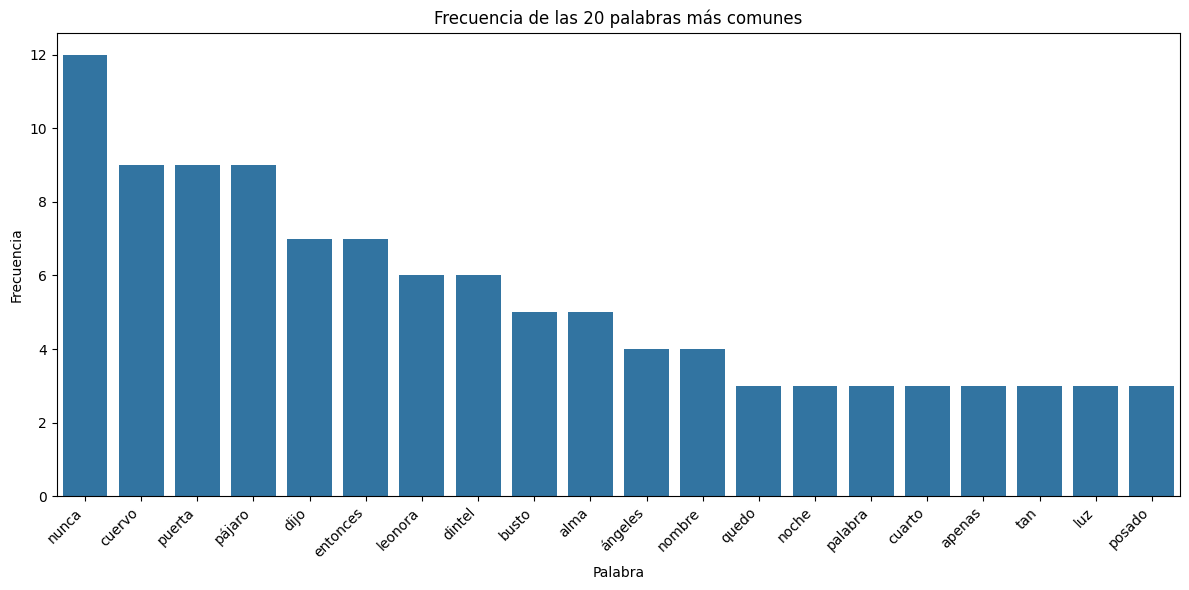

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

frecuencia_palabras = df_palabras['palabra'].value_counts().nlargest(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=frecuencia_palabras.index, y=frecuencia_palabras.values)
plt.title('Frecuencia de las 20 palabras más comunes')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

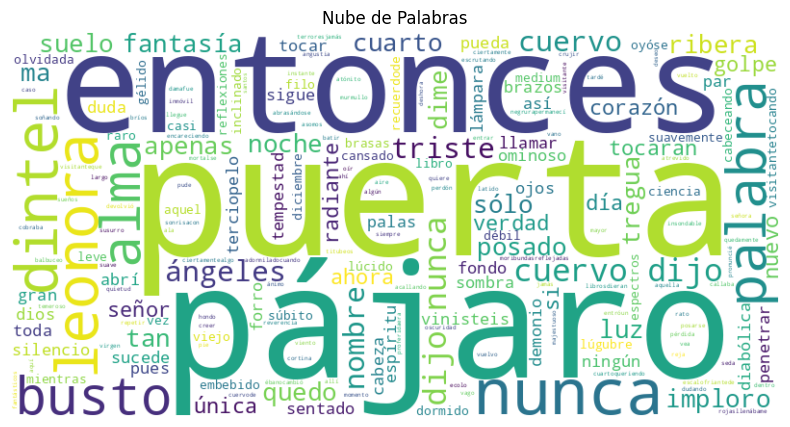

In [ ]:
from wordcloud import WordCloud

texto_para_nube = ' '.join(df_palabras['palabra'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_para_nube)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras')
plt.show()

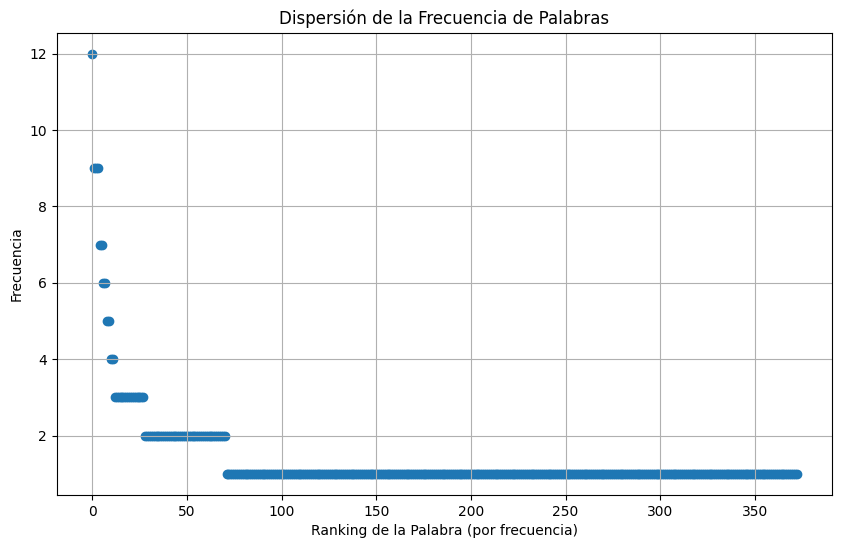

In [ ]:
frecuencia_palabras_df = df_palabras['palabra'].value_counts().reset_index()
frecuencia_palabras_df.columns = ['palabra', 'frecuencia']

plt.figure(figsize=(10, 6))
plt.scatter(range(len(frecuencia_palabras_df)), frecuencia_palabras_df['frecuencia'])
plt.title('Dispersión de la Frecuencia de Palabras')
plt.xlabel('Ranking de la Palabra (por frecuencia)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

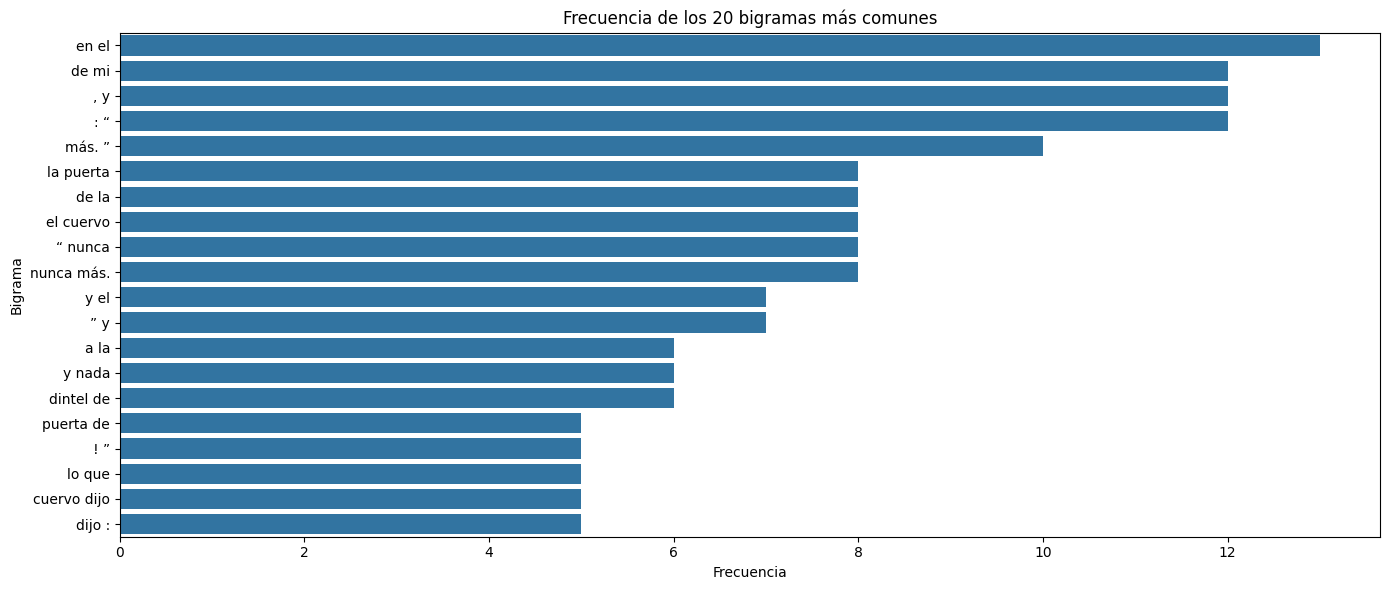

In [ ]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

# Re-tokenizar sin eliminar stopwords para analizar las secuencias de palabras
tokens_original = word_tokenize(texto_poema.lower())

finder = BigramCollocationFinder.from_words(tokens_original)
bigramas_frecuentes = finder.ngram_fd.most_common(20)

bigramas = [" ".join(bg) for bg, count in bigramas_frecuentes]
frecuencias_bigramas = [count for bg, count in bigramas_frecuentes]

plt.figure(figsize=(14, 6))
sns.barplot(x=frecuencias_bigramas, y=bigramas)
plt.title('Frecuencia de los 20 bigramas más comunes')
plt.xlabel('Frecuencia')
plt.ylabel('Bigrama')
plt.tight_layout()
plt.show()

# Conclusion

📊 Gráfica de barras – Frecuencia de palabras
Las palabras más repetidas en el poema – "cuervo", "noche", "alma", "Lenore", "sombra" y "nunca" – reflejan la esencia de la historia: pérdida, dolor y desesperanza. El cuervo, símbolo de fatalidad, aparece en la oscura noche del narrador, atormentándolo con el recuerdo de Lenore y repitiéndole que no hay esperanza para su alma. La constante repetición de "nunca" enfatiza la imposibilidad de superar el dolor, mientras que la "sombra" representa la melancolía que lo consume. En conjunto, estas palabras crean una atmósfera sofocante donde el protagonista se hunde en su propio tormento.

☁️ Nube de palabras
Al igual que en la gráfica de barras, la nube de palabras destaca los términos más frecuentes, pero con un impacto visual más claro: "cuervo" y "nunca" dominan, subrayando su papel central en la historia. La insistencia en "nunca" refuerza la idea de que el protagonista está atrapado en un destino inescapable, mientras que "cuervo" simboliza su condena definitiva. Esta representación gráfica hace aún más evidente cómo el poema gira en torno a la desesperanza y la imposibilidad de encontrar consuelo.

📈 Gráfica de dispersión – Frecuencia de palabras
La distribución de las palabras a lo largo del poema muestra cómo las emociones del narrador evolucionan. Se nota que las palabras negativas aparecen con más fuerza en momentos clave, lo que sugiere que la desesperación se intensifica progresivamente. Esto nos permite ver que el poema no es solo un lamento estático, sino un descenso gradual hacia la locura y la resignación, donde cada repetición de "nunca" marca un paso más en la condena del narrador.

📊 Gráfica de barras – Frecuencia de bigramas
Los bigramas más repetidos – "nunca más", "el cuervo", "mi alma" y "diciembre sombrío" – encapsulan la tragedia del poema. "Nunca más", repetido por el cuervo, es el eco de la desesperanza absoluta; "el cuervo" es el recordatorio inquebrantable de la fatalidad; "mi alma" refleja el tormento personal del narrador y su lucha interna, y "diciembre sombrío" establece un ambiente lúgubre y helado que refuerza la sensación de pérdida irremediable. Juntos, estos elementos construyen la sensación de un destino inevitable donde el narrador está condenado a sufrir eternamente.